<a href="https://colab.research.google.com/github/tommybebe/til/blob/master/ml/Chest_X_Ray_Images_(Pneumonia)_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References
- [TensorFlow Pneumonia Classification on X-rays
](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays)

## Data

In [2]:
from google.colab import auth
auth.authenticate_user()

In [112]:
!gsutil -m cp -r gs://minwoo-lee/competition/pneumonia/* .

Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0001-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0003-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0005-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0006-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0007-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0011-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0009-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0011-0001-0002.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0010-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0011-0001-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0013-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumonia/test/NORMAL/IM-0015-0001.jpeg...
Copying gs://minwoo-lee/competition/pneumo

## Model

In [113]:
import os
import pandas as pd
import numpy as np
from string import Template
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score


random_seed = 42
tf.random.set_seed(random_seed)

In [114]:
def make_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(64, 64, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.4))

    model.add(Dense(2, activation="softmax"))
    return model

### With GPU, CPU

In [115]:
gen = ImageDataGenerator()
model = make_model()
IMAGE_SIZE = (64, 64)

train_batches = gen.flow_from_directory("train", IMAGE_SIZE, color_mode="grayscale", shuffle=True, seed=1, batch_size=16)
test_batches = gen.flow_from_directory("test", IMAGE_SIZE, shuffle=False, color_mode="grayscale", batch_size=8)
valid_batches = gen.flow_from_directory("val", IMAGE_SIZE, color_mode="grayscale", shuffle=True, seed=1, batch_size=16)

Found 525 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.


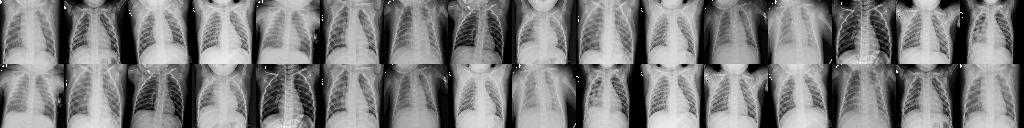

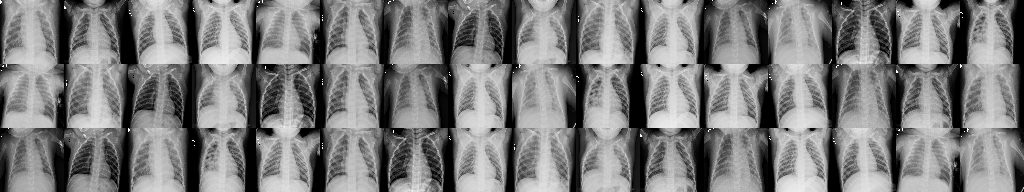

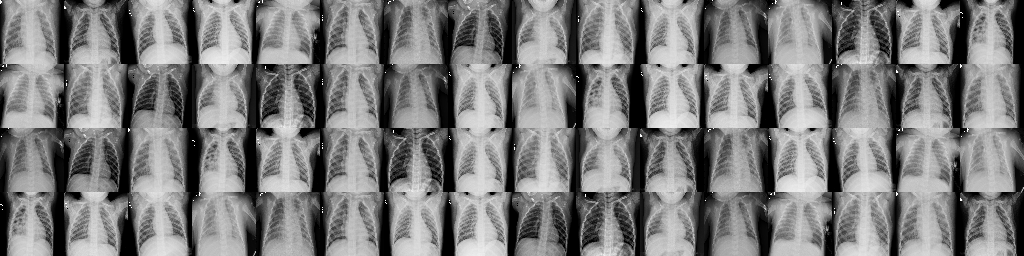

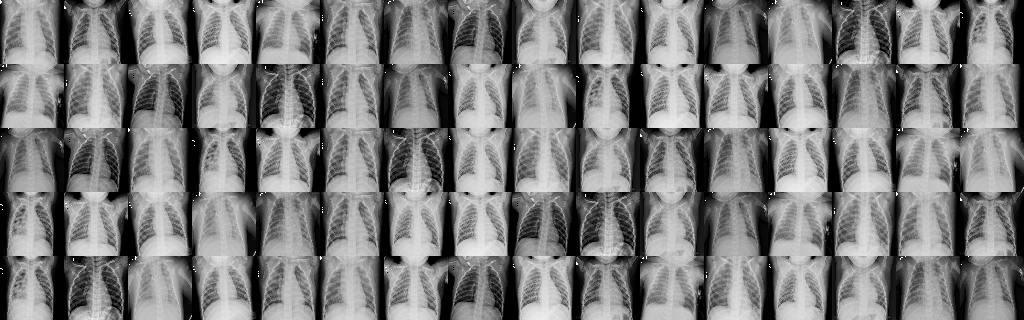

In [113]:
valid_batches = gen.flow_from_directory("val", model.input_shape[1:3], color_mode="grayscale", shuffle=True, seed=1, batch_size=16)
iterations = 5
images = []

for i in enumerate(range(iterations)):
    img, label = obj .next()
    n_img = len(label)
    
    base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)  # keras는 RGB, openCV는 BGR이라 변경함
    for idx in range(n_img - 1):
        img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
        base = np.hstack((base, img2))
    images.append(base)
 
img = images[0]
for idx in range(len(images) - 1):
    img = np.vstack((img, images[idx + 1]))
    cv2_imshow(img)


In [28]:
%%time
with tf.device('/CPU:0'):
    model = make_model()
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_batches, validation_data=valid_batches, epochs=1)

33/33 [==============================] - 17s 524ms/step - loss: 0.5367 - accuracy: 0.8933 - val_loss: 20.5643 - val_accuracy: 0.5000
CPU times: user 34.8 s, sys: 789 ms, total: 35.6 s
Wall time: 19.3 s


In [27]:
%%time
with tf.device('/device:GPU:0'):
    model = make_model()
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_batches, validation_data=valid_batches, epochs=1)

33/33 [==============================] - 6s 167ms/step - loss: 0.6031 - accuracy: 0.8914 - val_loss: 25.0534 - val_accuracy: 0.5000
CPU times: user 6.96 s, sys: 194 ms, total: 7.16 s
Wall time: 6.76 s


### with TPU
> will not work on TPUs, ... You'll have to move your dataset to GCS and load it with tf.data.Dataset for best results. This codelab covers the basics and this document shows how to convert an existing image classification dataset to TFRecords.

- [codelab covers the basics](https://codelabs.developers.google.com/codelabs/keras-flowers-data/#0)

- [Keras_MNIST_TPU.ipynb](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/keras_mnist_tpu.ipynb)

#### get ready for TPU

In [5]:
# Detect hardware
try:
  tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
  tpu_resolver = None
  gpus = tf.config.experimental.list_logical_devices("GPU")

# Select appropriate distribution strategy
if tpu_resolver:
  tf.config.experimental_connect_to_cluster(tpu_resolver)
  tf.tpu.experimental.initialize_tpu_system(tpu_resolver)
  strategy = tf.distribute.TPUStrategy(tpu_resolver)
  print('Running on TPU ', tpu_resolver.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on CPU')
  
print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Initializing the TPU system: grpc://10.89.230.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.89.230.138:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.89.230.138:8470']
Number of accelerators:  8


#### make TF records

In [130]:
IMAGE_SIZE = [64, 64]
AUTOTUNE = tf.data.experimental.AUTOTUNE
GCS_PATH = 'gs://minwoo-lee/competition/pneumonia'
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
EPOCHS = 25


def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == "PNEUMONIA"

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, IMAGE_SIZE)

def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds


train_filenames = tf.io.gfile.glob(str(GCS_PATH + '/train/*/*'))
val_filenames = tf.io.gfile.glob(str(GCS_PATH + '/val/*/*'))

train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [134]:
# def show_batch(image_batch, label_batch):
#     plt.figure(figsize=(10,10))
#     for n in range(25):
#         ax = plt.subplot(5,5,n+1)
#         plt.imshow(image_batch[n])
#         if label_batch[n]:
#             plt.title("PNEUMONIA")
#         else:
#             plt.title("NORMAL")
#         plt.axis("off")


# image_batch, label_batch = next(iter(train_ds))
# show_batch(image_batch.numpy(), label_batch.numpy())

In [139]:
def make_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(64, 64, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.4))

    model.add(Dense(1, activation="sigmoid"))
    return model

with strategy.scope():
    model = make_model()
    model.compile(Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [142]:
train_steps = tf.data.experimental.cardinality(train_list_ds).numpy()
val_steps = tf.data.experimental.cardinality(val_list_ds).numpy()
model.fit(
    train_ds, 
    steps_per_epoch=steps,
    validation_data=val_ds, 
    validation_steps=val_steps, 
    epochs=1)

  1/525 [..............................] - ETA: 14s - loss: 6.7052e-08 - accuracy: 0.4766WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_train_batch_end` time: 0.0286s). Check your callbacks.


525/525 [==============================] - ETA: 0s - loss: 6.8343e-08 - accuracy: 0.4795WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_test_batch_end` time: 0.0175s). Check your callbacks.


525/525 [==============================] - 20s 39ms/step - loss: 6.8343e-08 - accuracy: 0.4795 - val_loss: 5.9602e-08 - val_accuracy: 0.4375


### Predict

In [39]:
p = model.predict(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)


78/78 [==============================] - 9s 111ms/step


In [49]:
pre.groupby(['label', 'pre']).count()

0    1  filename
label pre                    
0     0    234  234       234
1     0    364  364       364
      1     26   26        26

In [40]:
recall_score(pre["label"],pre["pre"])


0.06666666666666667

In [41]:
roc_auc_score(pre["label"],pre[1])

0.8235371466140696

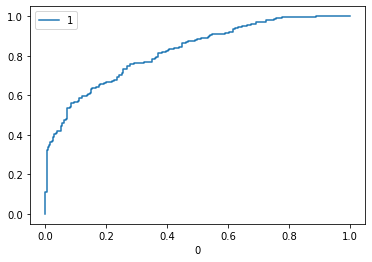

In [42]:
tpr,fpr,thres = roc_curve(pre["label"],pre[1])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)
